# Tutorial 5: 3D spatial domain identification

We extended STAGATE for 3D spatial domain identification by simultaneously considering the 2D SNN within each section and neighboring spots between adjacent section. The key idea of the usage of 3D SNN is that the biological differences between consecutive sections should be continuous, so we can enhance the similarity between adjacent sections to eliminate the discontinuous independent technical noises.

In this tutorial, we applied STAGATE onto a pseudo 3D ST data constructed by aligning the spots of the “cord-like” structure in seven hippocampus sections profiled by Slide-seq.

The original Slide-seq can be downloaded from https://portals.broadinstitute.org/single_cell/study/slide-seq-study. We provided the processed data and aligned coordinates at https://drive.google.com/drive/folders/10lhz5VY7YfvHrtV40MwaqLmWz56U9eBP?usp=sharing.

## Preparation

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys

In [3]:
import STAGATE

In [4]:
# the location of R (used for the mclust clustering)
os.environ['R_HOME'] = 'D:\Program Files\R\R-4.0.3'
os.environ['R_USER'] = 'D:\ProgramData\Anaconda3\Lib\site-packages\rpy2'

In [5]:
data = pd.read_csv('Data/3D_Hippo_expression.txt', sep='\t', index_col=0)
Aligned_coor = pd.read_csv('Data/ICP_Align_Coor.txt', sep='\t', index_col=0)

In [6]:
Aligned_coor.head()

,X,Y,Z,Section
AAAAACAACCAAT-13,3946.072727,3599.436364,6000,Puck_180531_13
AAAAGTCCATTAT-13,2401.628788,3550.333333,6000,Puck_180531_13
AAACAACGCGCGA-13,2921.968153,3353.687898,6000,Puck_180531_13
AAACAATTCAATA-13,2711.556338,3365.542254,6000,Puck_180531_13
AAACACGCTGCCC-13,2351.863354,4265.447205,6000,Puck_180531_13


In [7]:
adata = sc.AnnData(data)
adata

AnnData object with n_obs × n_vars = 10908 × 9420

In [8]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [9]:
# loading metadata and aligned coordinates
adata.obs['X'] = Aligned_coor.loc[adata.obs_names, 'X']
adata.obs['Y'] = Aligned_coor.loc[adata.obs_names, 'Y']
adata.obs['Z'] = Aligned_coor.loc[adata.obs_names, 'Z']
adata.obs['Section_id'] = Aligned_coor.loc[adata.obs_names, 'Section']

In [10]:
# loading the spatial locations
adata.obsm['spatial'] = adata.obs.loc[:, ['X', 'Y']].values

In [11]:
section_colors = ['#02899A', '#0E994D', '#86C049', '#FBB21F', '#F48022', '#DA5326', '#BA3326']

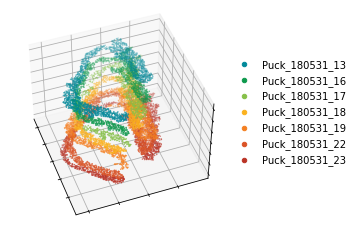

In [12]:
fig = plt.figure(figsize=(4, 4))
ax1 = plt.axes(projection='3d')
for it, label in enumerate(np.unique(adata.obs['Section_id'])):
    temp_Coor = adata.obs.loc[adata.obs['Section_id']==label, :]
    temp_xd = temp_Coor['X']
    temp_yd = temp_Coor['Y']
    temp_zd = temp_Coor['Z']
    ax1.scatter3D(temp_xd, temp_yd, temp_zd, c=section_colors[it],s=0.2, marker="o", label=label)

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_zlabel('')

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

plt.legend(bbox_to_anchor=(1,0.8), markerscale=10, frameon=False)

ax1.elev = 45
ax1.azim = -20

plt.show()

## Constructing 3D spatial networks

In [13]:
section_order = ['Puck_180531_13', 'Puck_180531_16', 'Puck_180531_17',
                 'Puck_180531_18', 'Puck_180531_19', 'Puck_180531_22', 
                 'Puck_180531_23']

In [14]:
STAGATE.Cal_Spatial_Net_3D(adata, rad_cutoff_2D=50, rad_cutoff_Zaxis=5,
                           key_section='Section_id', section_order = section_order, 
                           max_neigh=50, verbose=True)

Radius used for 2D SNN: 50
Radius used for SNN between sections: 5
------Calculating 2D SNN of section  Puck_180531_13


Trying to set attribute `.uns` of view, copying.


This graph contains 22974 edges, 1692 cells.
13.5780 neighbors per cell on average.
------Calculating 2D SNN of section  Puck_180531_16


Trying to set attribute `.uns` of view, copying.


This graph contains 20546 edges, 1476 cells.
13.9201 neighbors per cell on average.
------Calculating 2D SNN of section  Puck_180531_17


Trying to set attribute `.uns` of view, copying.


This graph contains 11794 edges, 1138 cells.
10.3638 neighbors per cell on average.
------Calculating 2D SNN of section  Puck_180531_18


Trying to set attribute `.uns` of view, copying.


This graph contains 18278 edges, 1363 cells.
13.4101 neighbors per cell on average.
------Calculating 2D SNN of section  Puck_180531_19


Trying to set attribute `.uns` of view, copying.


This graph contains 22344 edges, 1788 cells.
12.4966 neighbors per cell on average.
------Calculating 2D SNN of section  Puck_180531_22


Trying to set attribute `.uns` of view, copying.


This graph contains 24544 edges, 1835 cells.
13.3755 neighbors per cell on average.
------Calculating 2D SNN of section  Puck_180531_23


Trying to set attribute `.uns` of view, copying.


This graph contains 18922 edges, 1616 cells.
11.7092 neighbors per cell on average.
------Calculating SNN between adjacent section Puck_180531_13 and Puck_180531_16.


Trying to set attribute `.uns` of view, copying.


This graph contains 34482 edges, 3168 cells.
10.8845 neighbors per cell on average.
------Calculating SNN between adjacent section Puck_180531_16 and Puck_180531_17.


Trying to set attribute `.uns` of view, copying.


This graph contains 23078 edges, 2614 cells.
8.8286 neighbors per cell on average.
------Calculating SNN between adjacent section Puck_180531_17 and Puck_180531_18.


Trying to set attribute `.uns` of view, copying.


This graph contains 25284 edges, 2501 cells.
10.1096 neighbors per cell on average.
------Calculating SNN between adjacent section Puck_180531_18 and Puck_180531_19.


Trying to set attribute `.uns` of view, copying.


This graph contains 24944 edges, 3151 cells.
7.9162 neighbors per cell on average.
------Calculating SNN between adjacent section Puck_180531_19 and Puck_180531_22.


Trying to set attribute `.uns` of view, copying.


This graph contains 26128 edges, 3623 cells.
7.2117 neighbors per cell on average.
------Calculating SNN between adjacent section Puck_180531_22 and Puck_180531_23.


Trying to set attribute `.uns` of view, copying.


This graph contains 21110 edges, 3451 cells.
6.1171 neighbors per cell on average.
3D SNN contains 294428 edges, 10908 cells.
26.9919 neighbors per cell on average.


## Running STAGATE with 3D spatial networks

In [15]:
adata = STAGATE.train_STAGATE(adata, alpha=0)

Size of Input:  (10908, 3000)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [09:19<00:00,  1.12s/it]


In [16]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)

In [17]:
num_cluster = 4
adata = STAGATE.mclust_R(adata, num_cluster, used_obsm='STAGATE')

In [18]:
adata.uns['Section_id_colors'] = ['#02899A', '#0E994D', '#86C049', '#FBB21F', '#F48022', '#DA5326', '#BA3326']

... storing 'Section_id' as categorical


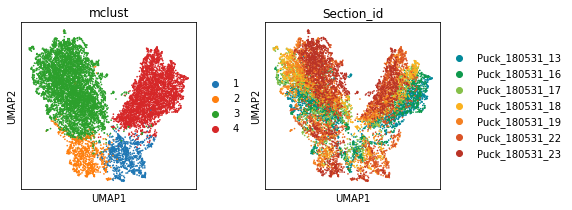

In [19]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color=['mclust', 'Section_id'])

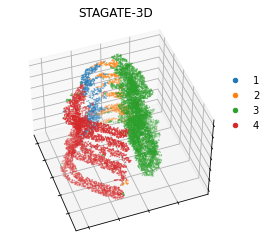

In [20]:
fig = plt.figure(figsize=(4, 4))
ax1 = plt.axes(projection='3d')
for it, label in enumerate(np.unique(adata.obs['mclust'])):
    temp_Coor = adata.obs.loc[adata.obs['mclust']==label, :]
    temp_xd = temp_Coor['X']
    temp_yd = temp_Coor['Y']
    temp_zd = temp_Coor['Z']
    ax1.scatter3D(temp_xd, temp_yd, temp_zd, c=adata.uns['mclust_colors'][it],s=0.2, marker="o", label=label)

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_zlabel('')

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

plt.legend(bbox_to_anchor=(1.2,0.8), markerscale=10, frameon=False)
plt.title('STAGATE-3D')

ax1.elev = 45
ax1.azim = -20

plt.show()

## Running STAGATE with 2D spatial networks (for comparison)

The 2D spatial networks are saved at adata.uns ('Spatial_Net_2D'). For camparison, we replace the 3D spatial networks with 2D spatial network and run STAGATE.

In [21]:
adata_2D = adata.copy()

In [22]:
adata_2D.uns['Spatial_Net'] = adata.uns['Spatial_Net_2D'].copy()

In [24]:
adata_2D = STAGATE.train_STAGATE(adata_2D, alpha=0)

Size of Input:  (10908, 3000)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [06:52<00:00,  1.21it/s]


In [25]:
sc.pp.neighbors(adata_2D, use_rep='STAGATE')
sc.tl.umap(adata_2D)

In [26]:
num_cluster = 4
adata_2D = STAGATE.mclust_R(adata_2D, num_cluster, used_obsm='STAGATE')

In [27]:
adata_2D.uns['Section_id_colors'] = ['#02899A', '#0E994D', '#86C049', '#FBB21F', '#F48022', '#DA5326', '#BA3326']

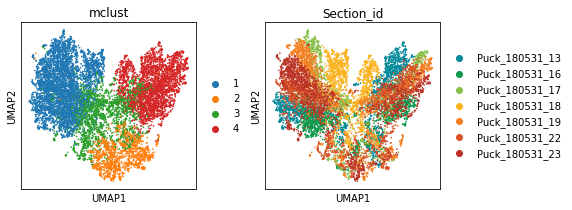

In [28]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata_2D, color=['mclust', 'Section_id'])

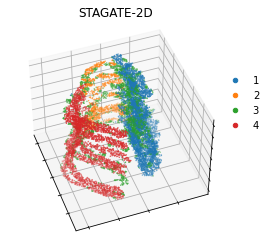

In [29]:
fig = plt.figure(figsize=(4, 4))
ax1 = plt.axes(projection='3d')
for it, label in enumerate(np.unique(adata_2D.obs['mclust'])):
    temp_Coor = adata_2D.obs.loc[adata_2D.obs['mclust']==label, :]
    temp_xd = temp_Coor['X']
    temp_yd = temp_Coor['Y']
    temp_zd = temp_Coor['Z']
    ax1.scatter3D(temp_xd, temp_yd, temp_zd, c=adata_2D.uns['mclust_colors'][it],s=0.2, marker="o", label=label)

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_zlabel('')

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

plt.legend(bbox_to_anchor=(1.2,0.8), markerscale=10, frameon=False)
plt.title('STAGATE-2D')

ax1.elev = 45
ax1.azim = -20

plt.show()

## STAGATE-2D vs STAGATE-3D

<AxesSubplot:title={'center':'Section_id (STAGATE-3D)'}, xlabel='UMAP1', ylabel='UMAP2'>

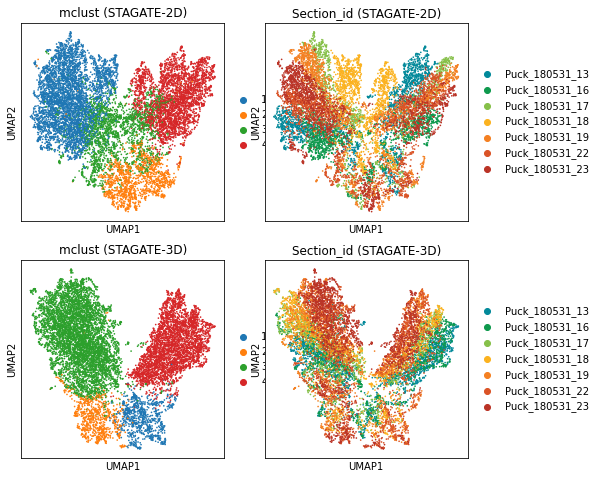

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
sc.pl.umap(adata_2D, color='mclust', title='mclust (STAGATE-2D)', show=False, ax=axs[0,0])
sc.pl.umap(adata_2D, color='Section_id', title='Section_id (STAGATE-2D)', show=False, ax=axs[0,1])
sc.pl.umap(adata, color='mclust', title='mclust (STAGATE-3D)', show=False, ax=axs[1,0])
sc.pl.umap(adata, color='Section_id', title='Section_id (STAGATE-3D)', show=False, ax=axs[1,1])